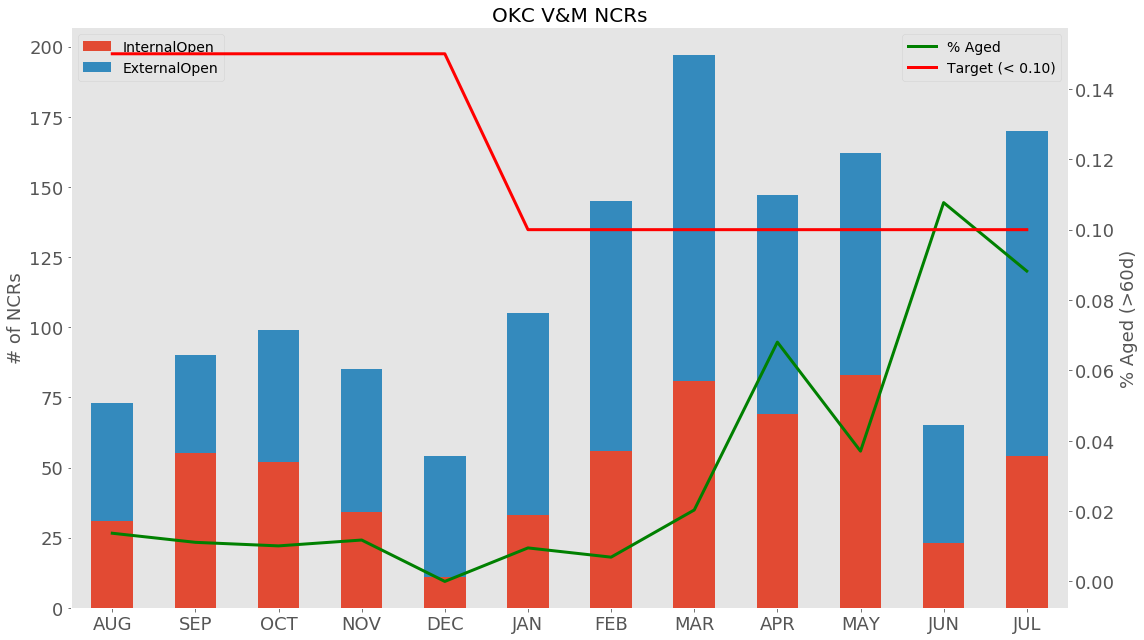

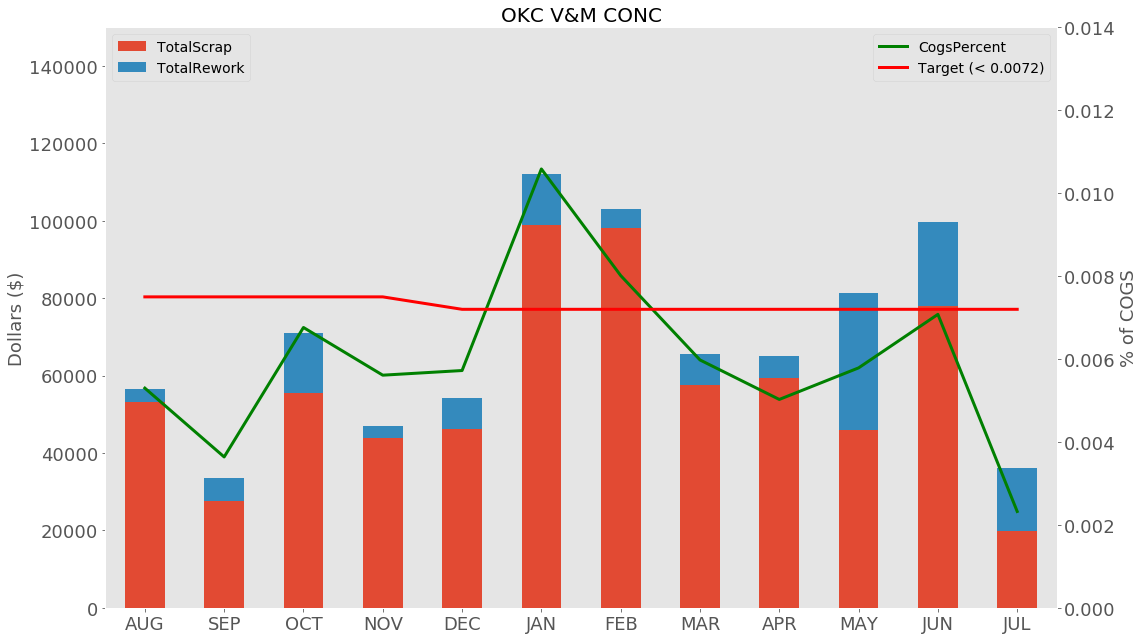

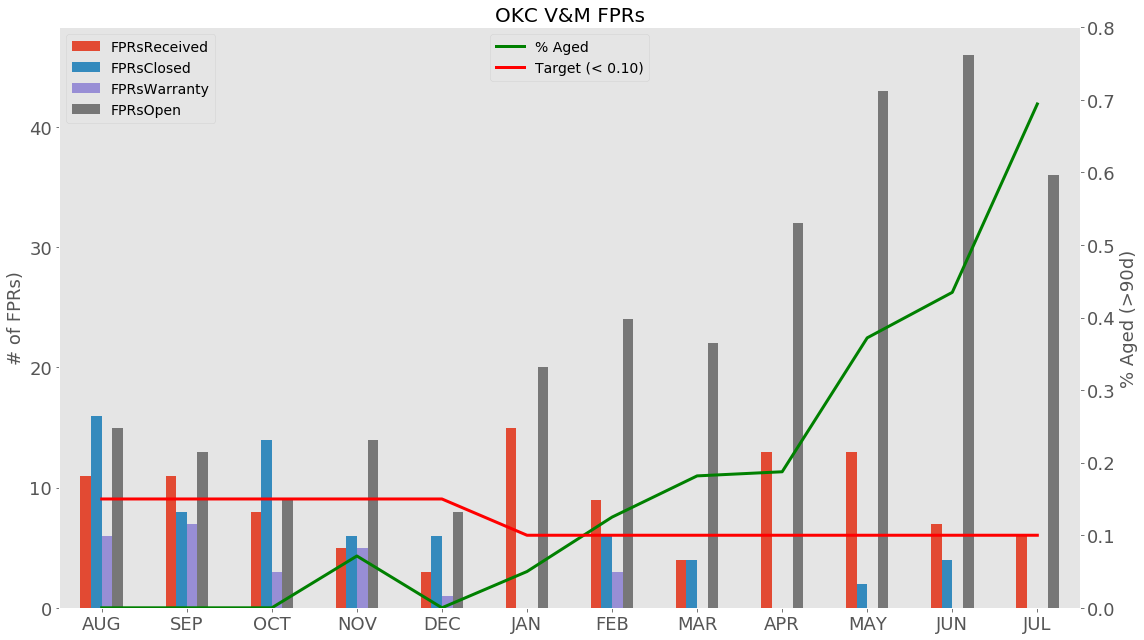

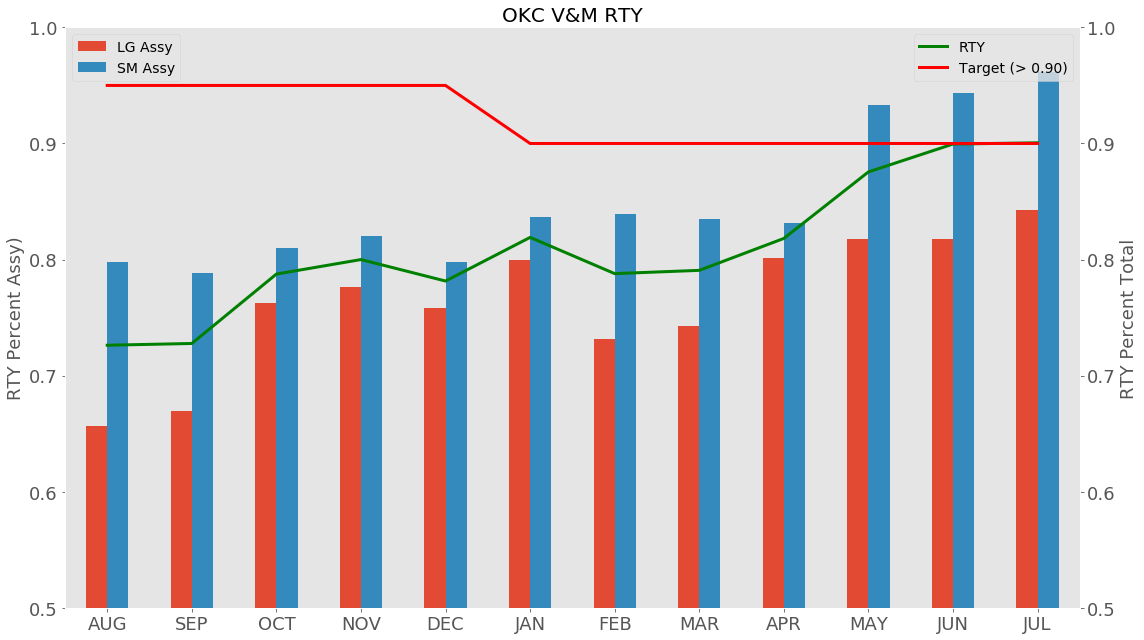

In [33]:
# script to compile data from excel into monthly quality charts
# author: Peter Zaffina
# date: 8/24/17

# imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as m_pdf
from matplotlib.ticker import FuncFormatter
import time
import os
from PyPDF2 import PdfFileMerger, PdfFileReader
%matplotlib inline
plt.style.use('ggplot')

# set variables
file_dir = "C:\\Users\\100355\\Documents\\Quality Manager\\Data\MonthlyCharts"
data_file = "OKC Quality Monthly Charts.xlsx"
current_date = time.strftime("%Y-%m-%d - %H%M")
fig_size = (16, 9)
title_size = 20

pdf_ncrs = "NCRs-" + current_date + ".pdf"
pdf_conc = "CONC-" + current_date + ".pdf"
pdf_fprs = "FPRs-" + current_date + ".pdf"
pdf_rty = "RTY-" + current_date + ".pdf"

# get the data from the file and put it into pandas dataframes
df_ncrs = pd.read_excel(os.path.join(file_dir, data_file), sheetname='NCRs')
df_conc = pd.read_excel(os.path.join(file_dir, data_file), sheetname='CONC')
df_fprs = pd.read_excel(os.path.join(file_dir, data_file), sheetname='FPRs')
df_rty = pd.read_excel(os.path.join(file_dir, data_file), sheetname='RTY')

# plot of NCRs
fig, ax = plt.subplots(figsize=fig_size)
df_ncrs[-12:].plot.bar(x='Month', y=['InternalOpen', 'ExternalOpen'], stacked=True, ax=ax, fontsize=18, rot=0)#table=True
ax2 = df_ncrs[-12:].plot.line(x='Month', y='PercentAged', ax=ax, secondary_y=True, color='green', lw=3, label='% Aged')
ax5 = df_ncrs[-12:].plot.line(x='Month', y='OkcTarget', ax=ax, secondary_y=True, color='red', lw=3, label='Target (< 0.10)')
ax.set_title('OKC V&M NCRs', fontsize=title_size)
ax.set_xlabel('', fontsize=18)
ax.set_ylabel('# of NCRs', fontsize=18)
ax2.set_ylabel('% Aged (>60d)', fontsize=18)
ax2.tick_params('y', labelsize=18)
ax.legend(loc='upper left', prop={'size': 14})
ax2.grid(False)
ax2.legend(loc='upper right', prop={'size': 14})
plt.xlim(-0.5,11.5)
plt.tight_layout()

# save chart to pdf
plt.savefig(os.path.join(file_dir, pdf_ncrs))

# plot of CONC
fig2, ax3 = plt.subplots(figsize=fig_size)
df_conc[-12:].plot.bar(x='Month', y=['TotalScrap', 'TotalRework'], stacked=True, ax=ax3, fontsize=18, rot=0, ylim=(0,150000)) #table=True
ax4 = df_conc[-12:].plot.line(x='Month', y='CogsPercent', ax=ax3, secondary_y=True, color='green', lw=3)#, fontsize=18)
ax6 = df_conc[-12:].plot.line(x='Month', y='Target', ax=ax3, secondary_y=True, color='red', lw=3, label='Target (< 0.0072)')#, fontsize=18)
ax3.set_title('OKC V&M CONC', fontsize=title_size)
ax3.set_xlabel('', fontsize=18)
ax3.set_ylabel('Dollars ($)', fontsize=18)
ax4.set_ylabel('% of COGS', fontsize=18)
ax4.tick_params('y', labelsize=18)
ax3.legend(loc='upper left', prop={'size': 14})
ax4.grid(False)
#fig.tight_layout()
ax4.legend(loc='upper right', prop={'size': 14})
plt.xlim(-0.5,11.5)
plt.ylim(0, 0.014)
plt.tight_layout()

# save chart to pdf
plt.savefig(os.path.join(file_dir, pdf_conc))

#plot of FPRs
fig3, ax7 = plt.subplots(figsize=fig_size)
df_fprs[-12:].plot.bar(x='Month', y=['FPRsReceived', 'FPRsClosed', 'FPRsWarranty', 'FPRsOpen'], ax=ax7, fontsize=18, rot=0) #table=True
ax4 = df_fprs[-12:].plot.line(x='Month', y='FPRsPercentAged', ax=ax7, secondary_y=True, color='green', lw=3, label='% Aged')#, fontsize=18)
ax6 = df_fprs[-12:].plot.line(x='Month', y='OkcTarget', ax=ax7, secondary_y=True, color='red', lw=3, label='Target (< 0.10)')#, fontsize=18)
ax7.set_title('OKC V&M FPRs', fontsize=title_size)
ax7.set_xlabel('', fontsize=18)
ax7.set_ylabel('# of FPRs)', fontsize=18)
ax4.set_ylabel('% Aged (>90d)', fontsize=18)
ax4.tick_params('y', labelsize=18)
ax7.legend(loc='upper left', prop={'size': 14})
ax4.grid(False)
#fig.tight_layout()
ax4.legend(loc='upper center', prop={'size': 14})
plt.xlim(-0.5,11.5)
plt.ylim(0, 0.8)
plt.tight_layout()

# save chart to pdf
plt.savefig(os.path.join(file_dir, pdf_fprs))

#plot chart of RTY
fig4, ax8 = plt.subplots(figsize=fig_size)
df_rty[-12:].plot.bar(x='Month', y=['LgAssyRTY', 'SmAssyRTY'], ax=ax8, fontsize=18, rot=0, ylim=(.5, 1)) #table=True
ax9 = df_rty[-12:].plot.line(x='Month', y='TotRTY', ax=ax8, secondary_y=True, color='green', lw=3, label='RTY')#, fontsize=18)
ax10 = df_rty[-12:].plot.line(x='Month', y='TgtRTY', ax=ax8, secondary_y=True, color='red', lw=3, label='Target (> 0.90)')#, fontsize=18)
ax8.set_title('OKC V&M RTY', fontsize=title_size)
ax8.set_xlabel('', fontsize=18)
ax8.set_ylabel('RTY Percent Assy)', fontsize=18)
ax9.set_ylabel('RTY Percent Total', fontsize=18)
ax9.tick_params('y', labelsize=18)
ax8.legend(["LG Assy", "SM Assy"], loc='upper left', prop={'size': 14})
ax9.grid(False)
#fig.tight_layout()
ax9.legend(loc='upper right', prop={'size': 14})
plt.xlim(-0.5,11.5)
plt.ylim(.5, 1)
plt.tight_layout()

# save chart to pdf
plt.savefig(os.path.join(file_dir, pdf_rty))

# put all pdfs into one pdf
pdf_files = [f for f in os.listdir(file_dir) if f.endswith("pdf")]
merger = PdfFileMerger()

for filename in pdf_files:
    merger.append(PdfFileReader(os.path.join(file_dir, filename), "rb"))

merger.write(os.path.join(file_dir, "charts_all.pdf"))
    

## TODO: format axes for dollars, etc.
## Attempt to format the dollar axes
#def currency(y, pos):
#    'The two args are the value and tick position'
#    if y >= 1000000:
#        return '${:1.1f}M'.format(y*1e-6)
#    return '${:1.0f}K'.format(y*1e-3)

#formatter = FuncFormatter(currency)
#ax.yaxis.set_major_formatter(formatter)

## put all charts on one page
## Attempt to put all figures in one pdf
#pdf = m_pdf.PdfPages("output.pdf")
#for fig in range(1, fig.number):
#    pdf.savefig(fig)
#pdf.close()